In [92]:
import statsmodels.stats.power as smp
import numpy as np

In [93]:

# Par^ ametros do teste
alpha = 0.05 # N´ ıvel de signific^ ancia
power = 0.8 # Pot^ encia desejada
effect_size = 0.3 # Diferen¸ ca m´ınima detect´avel (magnitude do efeito)
num_predictors = 4 # N´ umero de vari´ aveis explicativas
# Determinar o tamanho da amostra por grupo
analysis = smp.TTestIndPower()
sample_size_per_group = analysis.solve_power(effect_size=effect_size,
alpha=alpha,
power=power,
alternative='two-sided')


In [94]:
# Ajustar para regress~ao com vari´ aveis explicativas
sample_size_total = sample_size_per_group * (1 + num_predictors)
# Exibir o tamanho da amostra necess´ ario
print(f"Tamanho da amostra por grupo: {np.ceil(sample_size_per_group)}")
print(f"Tamanho total ajustado para {num_predictors} variaveis explicativas:{np.ceil(sample_size_total)}")

Tamanho da amostra por grupo: 176.0
Tamanho total ajustado para 4 variaveis explicativas:877.0


Testar normalidade

In [95]:

 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from scipy.stats import shapiro, kstest, norm
 import statsmodels.api as sm

 

Shapiro-Wilk Teste: Estatıstica=0.6254165768623352, p-valor=7.448915704611301e-21
Kolmogorov-Smirnov Teste: Estatıstica=0.1689398787172377,p-valor=1.55774400031698e-05


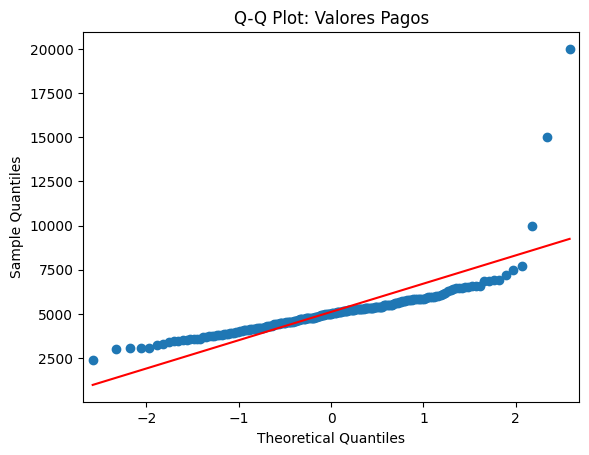

In [96]:
# Gerar dados simulados (valores pagos pelos clientes em R$)
np.random.seed(42)
# Distribui¸c~ ao normal simulada
valores_pagos = np.random.normal(loc=5000, scale=1000, size=200)
# Adicionar alguns valores extremos para verificar impacto
valores_pagos = np.append(valores_pagos, [10000, 15000, 20000])
# Teste de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(valores_pagos)
print(f"Shapiro-Wilk Teste: Estatıstica={stat_shapiro}, p-valor={p_shapiro}")
# Teste de Kolmogorov-Smirnov
stat_kstest, p_kstest = kstest(valores_pagos, 'norm',
args=(np.mean(valores_pagos), np.std(valores_pagos)))
print(f'Kolmogorov-Smirnov Teste: Estatıstica={stat_kstest},p-valor={p_kstest}')

# Q-Q Plot
sm.qqplot(valores_pagos, line='s')
plt.title("Q-Q Plot: Valores Pagos")
plt.show()

In [97]:
import pandas as pd

In [98]:
caminho=r"C:\Users\natal\Downloads\archive (1)\diabetes.csv"
df=pd.read_csv(caminho,encoding='utf-8')

In [99]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [100]:
#DiabetesPedigreeFunction=probab de ter diabetes
#skinthikness=grossura da pele
#BMI body mass index
#outcome=tem diabetes


Limpeza dados

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
#valores nulos(0)
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [124]:
#nan
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [125]:
# Verificar valores ausentes e possíveis inconsistências (valores zero onde não deveriam estar)
missing_info = df.isnull().sum()

# Verificar valores zero em colunas onde isso pode indicar dados ausentes (exceto 'Pregnancies' e 'Outcome')
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_counts = df[columns_with_zero].isin([0]).sum()

missing_info, zero_counts


(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 Glucose            5
 BloodPressure     35
 SkinThickness    227
 Insulin          374
 BMI               11
 dtype: int64)

In [126]:
df_cleaned = df.copy()
for column in columns_with_zero:
    median_value = df_cleaned[column].median()
    df_cleaned[column] = df_cleaned[column].replace(0, median_value)

# Verificar se os zeros foram tratados
df_cleaned[columns_with_zero].isin([0]).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Anãlise exploratória

In [104]:
#matriz correlação
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [105]:
#heatmap correlaçao
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Matriz de correlação diabetes')

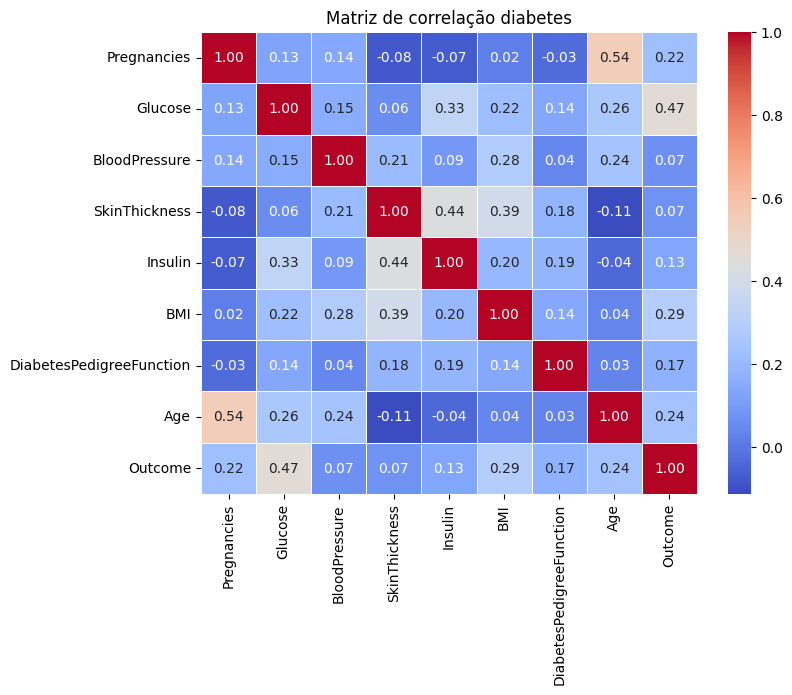

In [106]:
correlação=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlação, annot=True,cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlação diabetes')

In [107]:
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

2. Coeficiente de Variação (CV)
Uma maneira mais robusta de avaliar se o desvio padrão é alto ou baixo é calcular o coeficiente de variação (CV). Ele mede a dispersão relativa em relação à média e é dado por:

𝐶
𝑉
=
Desvio Padr
a
˜
o
M
e
ˊ
dia
×
100
CV= 
M 
e
ˊ
 dia
Desvio Padr 
a
˜
 o
​
 ×100
CV baixo (geralmente abaixo de 10%): Indica que os dados estão concentrados ao redor da média.
CV alto (geralmente acima de 30%): Indica que os dados estão mais dispersos.

In [108]:
cv=(df.std()/df.mean())*100

In [109]:
print(cv)
#abaixo de 10% - baixa dispersão
#acima de 30% - alta dispersão
#baixa variancia podem ser removidos
#alta variancia - pode ter bastante outliers

Pregnancies                  87.634133
Glucose                      26.446703
BloodPressure                28.009082
SkinThickness                77.677549
Insulin                     144.416986
BMI                          24.643717
DiabetesPedigreeFunction     70.215138
Age                          35.378816
Outcome                     136.678604
dtype: float64


não tem mts das variaveis independentes q com variancia baixa
mais dispersos - pregnancies/skinthickness/insulin


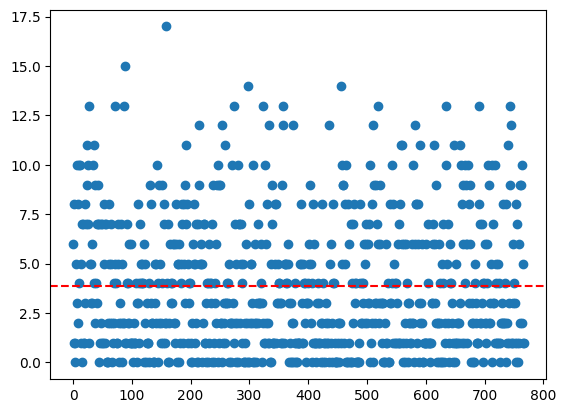

In [110]:
plt.scatter(df['Pregnancies'].index,df['Pregnancies'],label='valores')
plt.axhline(y=df['Pregnancies'].mean(),color='r',linestyle='--')
plt.show()


knn algoritmo

Vou explicar com mais detalhes o que significa o random_state e como ele garante que a divisão dos dados seja reproduzível.

Quando usamos a função train_test_split, por padrão, os dados são divididos de forma aleatória em conjunto de treinamento e teste. Isso significa que, se você rodar o código várias vezes, pode obter divisões diferentes dos dados a cada execução, porque o processo de divisão é aleatório.

O que o random_state faz?
random_state é uma semente (seed) para o gerador de números aleatórios.
Quando você define um valor para random_state, você está fixando a sequência de aleatoriedade, ou seja, a divisão dos dados será sempre a mesma em diferentes execuções do código.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [112]:
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#20% teste - 80% de treino

random_state=42:
Garante que a divisão dos dados seja reprodutível. Com isso, sempre que rodar o código, o conjunto de treino e teste será o mesmo, facilitando análises consistentes.
O número 42 é arbitrário e pode ser substituído por outro número, mas deve ser o mesmo se você quiser reproduzir os resultados.

In [23]:
#normalizar os dados
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [24]:
#criar modelo
knn=KNeighborsClassifier(n_neighbors=3)
#O modelo é criado com 3 vizinhos (parâmetro n_neighbors=3).

In [25]:
#treinar
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred=knn.predict(x_test)

In [27]:
accuracy=accuracy_score(y_test,y_pred)

In [30]:
print(f'Precisão do modelo: {accuracy:.2f}')

Precisão do modelo: 0.62


A "boa" acurácia pode variar dependendo do contexto do problema. Aqui estão alguns exemplos:

Diagnóstico médico: Para um modelo que prevê a presença de doenças graves (como diabetes, câncer, etc.), uma acurácia acima de 80% seria excelente. No entanto, em alguns contextos críticos, você pode precisar de uma acurácia ainda maior.

Reconhecimento de imagem: Para problemas mais complexos de visão computacional (como identificação de objetos em imagens), uma acurácia de 90% ou mais é geralmente considerada boa.

Reconhecimento de fraudes financeiras: Se as fraudes representam uma pequena parte do conjunto de dados (desbalanceamento), uma acurácia de 90% pode não ser boa, pois o modelo pode simplesmente prever que não há fraude, acertando muitas vezes, mas não identificando as fraudes.

Naive Bayes
O que é: Um modelo probabilístico baseado no Teorema de Bayes.
Por que usar:
Muito rápido e eficiente, especialmente em datasets menores.
Bom para problemas onde as features são independentes (ou quase independentes).
Limitação:
Não funciona bem se houver muita correlação entre as features.

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [30]:
print(x_test)

[[ 0.49124165 -0.72667791 -0.44147615 ...  0.23374785 -0.17094071
   0.66661154]
 [-0.63368347 -0.28534901  0.31890843 ...  0.43537945 -1.08608042
  -1.07335756]
 [-0.63368347 -0.41144298 -0.17310512 ... -0.14579397 -1.05362866
  -1.07335756]
 ...
 [ 1.05370422 -0.82124838  0.18472291 ...  0.56584695  0.00754398
   1.77386461]
 [-0.63368347  0.78644972  0.09526591 ... -0.47789306 -0.47274211
  -0.44064153]
 [ 1.05370422 -1.48324172  0.09526591 ...  0.38793672  0.72148276
   0.35025352]]


In [115]:
#y_pred=model.predict(x_test)
accuracy_naive_bayes=accuracy_score(y_test,y_pred)


In [116]:
print(accuracy_naive_bayes)

0.7662337662337663


#calcula a acurácia comparando os valores reais(y_test) com as previsões do modelo (y_pred) - previsões feitas com base nos dados de teste(x_test)

Rótulos Reais (y_test):

python
Copiar
Editar
y_test = [0, 1, 1, 0, 1]
Esses são os valores reais para o conjunto de teste.

Previsões do Modelo (y_pred):

python
Copiar
Editar
y_pred = [0, 1, 0, 0, 1]
Esses são os valores previstos pelo modelo para o mesmo conjunto.

Cálculo da Acurácia: A função compara os dois arrays, verifica quantas previsões estão corretas e divide pelo número total de amostras:

Valores corretos: [0, 1, _, 0, 1] (o terceiro valor está errado).
Total de acertos: 4.
Total de amostras: 5.
Acurácia:4/5=0.8



In [86]:
print(accuracy_naive_bayes)

0.7662337662337663


Quando a Acurácia é uma Boa Métrica:
Classes Balanceadas:

Quando as classes possuem aproximadamente o mesmo número de exemplos, a acurácia é uma métrica confiável.
Exemplo:
Um conjunto de dados com 50% de pessoas com diabetes e 50% sem diabetes.
A acurácia reflete bem o desempenho do modelo.
Erro Custo-Benefício Simétrico:

Quando os custos de erros (falsos positivos e falsos negativos) são iguais.
Exemplo:
Um modelo que prevê se um email é spam ou não, onde o custo de errar um spam como "não spam" é o mesmo de classificar um email normal como "spam"

Quando a Acurácia NÃO é a Melhor Métrica:
Classes Desbalanceadas:

Se uma classe ocorre muito mais frequentemente que a outra, a acurácia pode ser enganosa.
Exemplo:
Dataset onde 95% dos pacientes não têm diabetes e apenas 5% têm.
Um modelo que sempre prevê "não tem diabetes" teria 95% de acurácia, mas seria inútil para identificar pacientes com diabetes.
Importância Diferente dos Erros:

Quando o custo de um falso positivo ou falso negativo é maior.
Exemplo:
Em diagnósticos médicos, um falso negativo ("não tem diabetes" quando a pessoa tem) pode ser mais perigoso do que um falso positivo.

In [36]:
#ver se as classes estão balanceadas
print(df['Outcome'].value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


Impacto do Desbalanceamento
Se os dados forem desbalanceados:

Modelos podem ser tendenciosos em favor da classe majoritária, ignorando a classe minoritária.
A acurácia pode ser enganosa, já que um modelo que sempre prevê a classe majoritária pode ter alta acurácia sem ser útil.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [38]:
#Relatório de classificação (Precision, Recall, F1-Score)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.72      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



precision: mede a proporção de previsões corretas da classe
precision=true positives/(true+false positives)
------
recal=exemplos reais de uma classe que foram corretamente previstos
recall=true positives/(true positives+false negatives)
----
F1-score: média harmônica entre precisão e revocação, equilibrando 2 métricas
F1=2*(Precision*Recall/Precision+Recall)
-----
Acurácia: proporções corretas sobre o total de exemplos
acurácia=(true positives+true negatives)/total de exemplos
-----
Macro Average:
Média simples das métricas (precision, recall e F1-score) calculada para todas as classes.
Trata todas as classes igualmente, sem considerar o desbalanceamento.
-----
Weighted Average:(CLASSE DESBALANCEADA)
Média ponderada das métricas, considerando o número de exemplos (suporte) de cada classe.
É mais representativa em casos de classes desbalanceadas.

Classe 0 (Negativo para diabetes):

Precision: 0.83
83% das vezes que o modelo previu "0", ele estava correto.
Recall: 0.85
O modelo identificou corretamente 85% dos exemplos reais da classe "0".
F1-Score: 0.84
Equilíbrio entre precisão e recall para a classe "0".
Support: 99
Havia 99 exemplos reais da classe "0" no conjunto de teste.
Classe 1 (Positivo para diabetes):

Precision: 0.72
72% das vezes que o modelo previu "1", ele estava correto.
Recall: 0.69
O modelo identificou corretamente 69% dos exemplos reais da classe "1".
F1-Score: 0.70
Equilíbrio entre precisão e recall para a classe "1".
Support: 55
Havia 55 exemplos reais da classe "1" no conjunto de teste.
Acurácia Geral: 0.79

O modelo teve um desempenho geral de 79%, considerando todas as previsões.
Macro Avg: 0.77

Média simples das métricas, sem considerar o tamanho das classes.
Mostra o desempenho médio por classe.
Weighted Avg: 0.79

Média ponderada que considera o número de exemplos por classe.
Como a classe "0" tem mais exemplos (99 contra 55), ela influencia mais no cálculo.

Ajustes para Lidar com a Proporção
Se o modelo tiver desempenho inferior na classe minoritária (Classe 1), algumas técnicas podem ajudar:

1. Ajuste de Pesos das Classes
Configure o modelo para penalizar mais os erros na classe minoritária, ajustando o peso das classes.
No scikit-learn, isso pode ser feito com o parâmetro class_weight='balanced'

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model=RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
#Relatório de classificação (Precision, Recall, F1-Score)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.72      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
#n mudou nada

Amostragem dos Dados
Oversampling: Aumente artificialmente o número de exemplos da classe minoritária (e.g., SMOTE).
Undersampling: Reduza o número de exemplos da classe majoritária.
Exemplo com SMOTE:

In [46]:
pip install imblearn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   --------------------------------------  235.5/238.4 kB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']
X_train_resampled,x_test,y_train_resampled,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#20% teste - 80% de treino

In [58]:
model=GaussianNB()
model.fit(X_train_resampled,y_train_resampled)
y_pred=model.predict(x_test)

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [59]:
y_pred=model.predict(x_test)
accuracy_naive_bayes=accuracy_score(y_test,y_pred)

In [60]:
print(accuracy_naive_bayes)

0.7662337662337663


In [61]:
#Relatório de classificação (Precision, Recall, F1-Score)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
#piorou o modelo

Modelos Específicos para Dados Desbalanceados
Modelos como XGBoost ou LightGBM permitem ajustes no aprendizado com parâmetros específicos para lidar com classes desbalanceadas.

In [51]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 14.2 MB/s eta 0:00:09
   ---------------------------------------- 1.0/124.9 MB 12.5 MB/s eta 0:00:10
    --------------------------------------- 1.6/124.9 MB 14.4 MB/s eta 0:00:09
    --------------------------------------- 2.3/124.9 MB 14.9 MB/s eta 0:00:09
    --------------------------------------- 2.7/124.9 MB 12.5 MB/s eta 0:00:10
   - -------------------------------------- 3.4/124.9 MB 12.8 MB/s eta 0:00:10
   - -------------------------------------- 4.2/124.9 MB 13.3 MB/s eta 0:00:10
   - -------------------------------------- 4.4/124.9 MB 12.2 MB/s eta 0:00:10
   - -------------------------------------- 5.2/124.9 MB 12.8 MB/s eta 0:00:10
   - -------------------------------------- 5.8/124.9 MB 13.3 MB/s eta 0:00:09
   -- ------------------------------------- 6.5/124.9 MB 13.3 MB/s eta 0:00:09
   -- ------------------------------------- 7.2/124.9 MB 13.


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#20% teste - 80% de treino

In [63]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [64]:
y_pred=model.predict(x_test)

In [66]:
accuracy_xgboost=accuracy_score(y_test,y_pred)

In [67]:
print(accuracy_xgboost)

0.7272727272727273


In [68]:
#Relatório de classificação (Precision, Recall, F1-Score)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



In [ ]:
#ficou pior ainda

In [39]:
#matriz de confusão
print(confusion_matrix(y_test,y_pred))

[[84 15]
 [17 38]]


 predito -  |predito +
    real -
    real +

In [127]:
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#20% teste - 80% de treino

In [70]:
from sklearn.metrics import classification_report, roc_auc_score

In [71]:
# AUC-ROC
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Probabilidade para a classe positiva
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc:.2f}")

AUC-ROC: 0.76


Árvore de decisão

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

c:\Users\natal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
accuracy_logisticregression=accuracy_score(y_test,y_pred)

In [74]:
print(accuracy_logisticregression)

0.7467532467532467


In [75]:
#Relatório de classificação (Precision, Recall, F1-Score)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [81]:
print(accuracy_naive_bayes)

0.7662337662337663


Métodos para Tunagem de Parâmetros
1. Busca em Grade (Grid Search)
Teste todas as combinações possíveis de hiperparâmetros em uma grade definida.

Vantagem: Garante explorar todas as combinações.
Desvantagem: Pode ser demorado para grandes espaços de busca.

In [87]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Modelo base
model = RandomForestClassifier(random_state=42)

In [89]:
# Hiperparâmetros a testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']}

In [90]:
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


No caso do param_dist, você está especificando os parâmetros do modelo, como o número de árvores (n_estimators), a profundidade máxima da árvore (max_depth), o número mínimo de amostras para dividir um nó (min_samples_split), e a ponderação das classes (class_weight).

Usar modelo para prever novos dados

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
# novos dados
novos_dados=pd.read_csv()

In [ ]:
# Fazer previsões nos novos dados
novas_predicoes = best_model.predict(novos_dados)

print("Predições para os novos pacientes:", novas_predicoes)

In [ ]:
# Obter as probabilidades de cada classe
novas_probabilidades = best_model.predict_proba(novos_dados)

print("Probabilidades para os novos pacientes:")
print(novas_probabilidades)

Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo com parâmetros padrão
model = RandomForestClassifier(random_state=42)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(x_test)

# Avaliar o desempenho
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Matriz de Confusão:
[[77 22]
 [21 34]]
Acurácia: 0.72


In [130]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Espaço de parâmetros
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 20),
    'class_weight': [None, 'balanced']
}

# Busca de parâmetros
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42,
    scoring='f1'
)

# Ajustar com os dados de treino
random_search.fit(X_train, y_train)

# Ver os melhores parâmetros
print("Melhores parâmetros:", random_search.best_params_)

# Melhor modelo
best_model = random_search.best_estimator_


Melhores parâmetros: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 16, 'n_estimators': 100}


In [131]:
# Fazer previsões com o melhor modelo
y_pred_best = best_model.predict(x_test)

# Avaliar o desempenho do modelo ajustado
print("Relatório de Classificação (Melhor Modelo):")
print(classification_report(y_test, y_pred_best))

print("Matriz de Confusão (Melhor Modelo):")
print(confusion_matrix(y_test, y_pred_best))

Relatório de Classificação (Melhor Modelo):
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

Matriz de Confusão (Melhor Modelo):
[[75 24]
 [14 41]]


Modelos onde a tunagem de hiperparâmetros é relevante
Modelos baseados em árvores e ensemble (e.g., Random Forest, XGBoost):

Esses modelos têm muitos hiperparâmetros, como o número de árvores (n_estimators), a profundidade máxima (max_depth), e o número mínimo de amostras para divisão (min_samples_split).
Tunagem é crucial para controlar overfitting e underfitting.
Modelos baseados em vetores de suporte (SVM):

Hiperparâmetros como o kernel (linear, rbf) e o coeficiente de regularização (C) podem ser ajustados para melhorar o desempenho.
Modelos de redes neurais:

Hiperparâmetros incluem o número de camadas ocultas, o número de neurônios por camada, a taxa de aprendizado (learning_rate), e o tamanho do lote (batch_size).
A tunagem é fundamental para alcançar bons resultados.
K-Nearest Neighbors (KNN):

O número de vizinhos (n_neighbors) e o tipo de métrica de distância (euclidean, manhattan) são ajustáveis.
Regressão logística ou regularizada (Lasso, Ridge):

Parâmetros como a força da regularização (C ou alpha) podem ser otimizados.
Modelos com menor necessidade de tunagem
Naive Bayes:

Esse modelo geralmente tem poucos ou nenhum hiperparâmetro para ajustar. Por exemplo:
Em Naive Bayes Gaussiano, a tunagem é limitada porque ele assume distribuições fixas dos dados.
Melhorias no desempenho são mais dependentes da preparação dos dados (e.g., normalização).
Regressão linear simples ou múltipla:

Não há muitos parâmetros a serem ajustados além do processo de feature selection e normalização.
